In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# OBTENIR LE DATASET

In [2]:
df = pd.read_csv('pointure.data')
df

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15
5,féminin,168,68.0,20
6,féminin,165,59.0,18
7,féminin,175,68.0,23


# EXPLORATION DES DONNÉES

In [3]:
df.columns

Index(['Genre', 'Taille(cm)', 'Poids(kg)', 'Pointure(cm)'], dtype='object')

In [4]:
df.shape

(8, 4)

In [5]:
df.head()

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15


In [6]:
df.describe()

,Taille(cm),Poids(kg),Pointure(cm)
count,8.000000,8.000000,8.000000
mean,171.500000,70.012500,23.625000
std,10.028531,13.118192,5.629958
min,152.000000,45.400000,15.000000
25%,167.250000,65.750000,19.500000
50%,172.500000,71.400000,24.000000
75%,180.000000,78.225000,28.500000
max,182.000000,86.200000,30.000000


# PRE-TRAITEMENT DES DONNÉES

In [7]:
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['masculin','féminin']
label_encoder.fit(input_classes)

# transformer un ensemble de classes
encoded_labels = label_encoder.transform(df['Genre'])
print(encoded_labels)
df['Genre'] = encoded_labels

df

[1 1 1 1 0 0 0 0]


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,1,182,81.6,30
1,1,180,86.2,28
2,1,170,77.1,30
3,1,180,74.8,25
4,0,152,45.4,15
5,0,168,68.0,20
6,0,165,59.0,18
7,0,175,68.0,23


<AxesSubplot:>

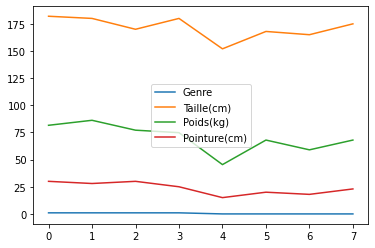

In [8]:
df.plot()

<AxesSubplot:>

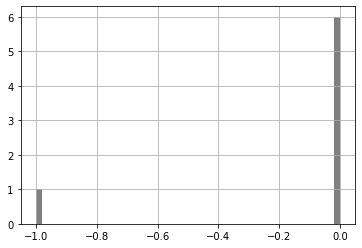

In [9]:
df['Genre'].diff().hist(color='k', alpha=0.5, bins=50)

<AxesSubplot:>

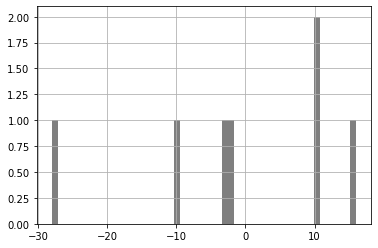

In [10]:
df['Taille(cm)'].diff().hist(color='k', alpha=0.5, bins=50)

<AxesSubplot:>

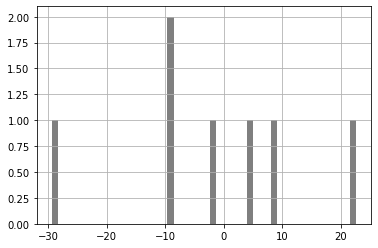

In [11]:
df['Poids(kg)'].diff().hist(color='k', alpha=0.5, bins=50)

<AxesSubplot:>

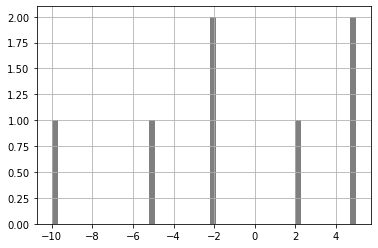

In [12]:
df['Pointure(cm)'].diff().hist(color='k', alpha=0.5, bins=50)

array([[<AxesSubplot:title={'center':'Genre'}>,
        <AxesSubplot:title={'center':'Taille(cm)'}>],
       [<AxesSubplot:title={'center':'Poids(kg)'}>,
        <AxesSubplot:title={'center':'Pointure(cm)'}>]], dtype=object)

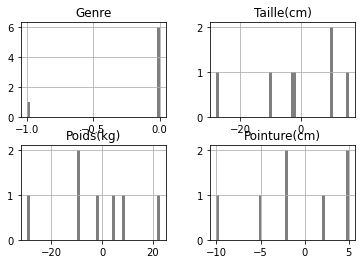

In [13]:
dfplot = pd.DataFrame(df.iloc[:, lambda dfToPredict: [0, 1, 2, 3]], columns=['Genre', 'Taille(cm)', 'Poids(kg)', 'Pointure(cm)'])
dfplot.diff().hist(color='k', alpha=0.5, bins=50)

<AxesSubplot:>

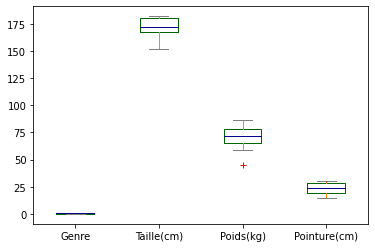

In [14]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
dfplot.plot.box(color=color, sym='r+')

# MATRICE DE CORRELATION ET DE PERSON

array([[<AxesSubplot:xlabel='Genre', ylabel='Genre'>,
        <AxesSubplot:xlabel='Taille(cm)', ylabel='Genre'>,
        <AxesSubplot:xlabel='Poids(kg)', ylabel='Genre'>,
        <AxesSubplot:xlabel='Pointure(cm)', ylabel='Genre'>],
       [<AxesSubplot:xlabel='Genre', ylabel='Taille(cm)'>,
        <AxesSubplot:xlabel='Taille(cm)', ylabel='Taille(cm)'>,
        <AxesSubplot:xlabel='Poids(kg)', ylabel='Taille(cm)'>,
        <AxesSubplot:xlabel='Pointure(cm)', ylabel='Taille(cm)'>],
       [<AxesSubplot:xlabel='Genre', ylabel='Poids(kg)'>,
        <AxesSubplot:xlabel='Taille(cm)', ylabel='Poids(kg)'>,
        <AxesSubplot:xlabel='Poids(kg)', ylabel='Poids(kg)'>,
        <AxesSubplot:xlabel='Pointure(cm)', ylabel='Poids(kg)'>],
       [<AxesSubplot:xlabel='Genre', ylabel='Pointure(cm)'>,
        <AxesSubplot:xlabel='Taille(cm)', ylabel='Pointure(cm)'>,
        <AxesSubplot:xlabel='Poids(kg)', ylabel='Pointure(cm)'>,
        <AxesSubplot:xlabel='Pointure(cm)', ylabel='Pointure(cm)'>]],
   

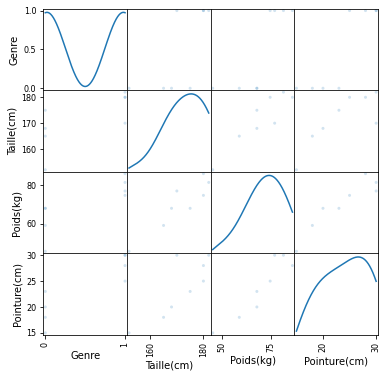

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfplot, alpha=0.2, figsize=(6, 6), diagonal='kde')

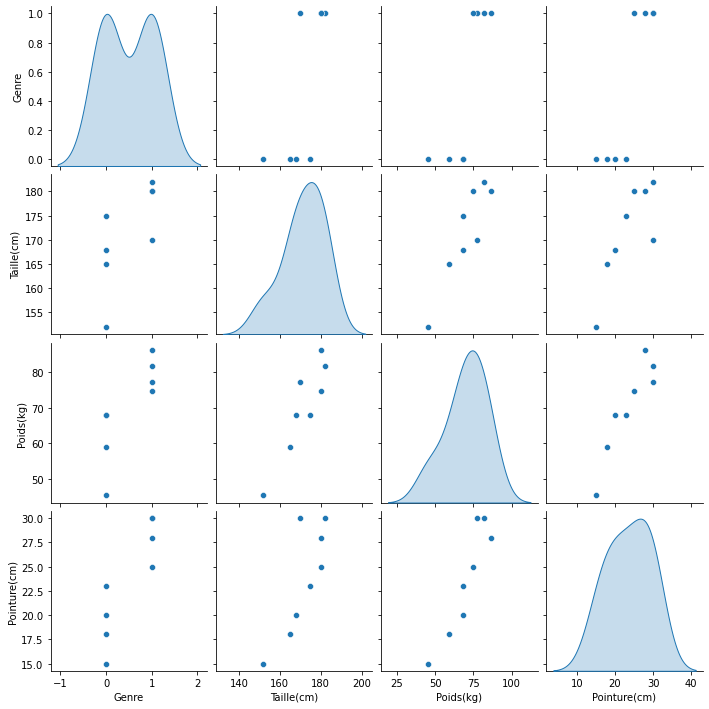

In [16]:
sns.pairplot(dfplot, diag_kind='kde', dropna=True)

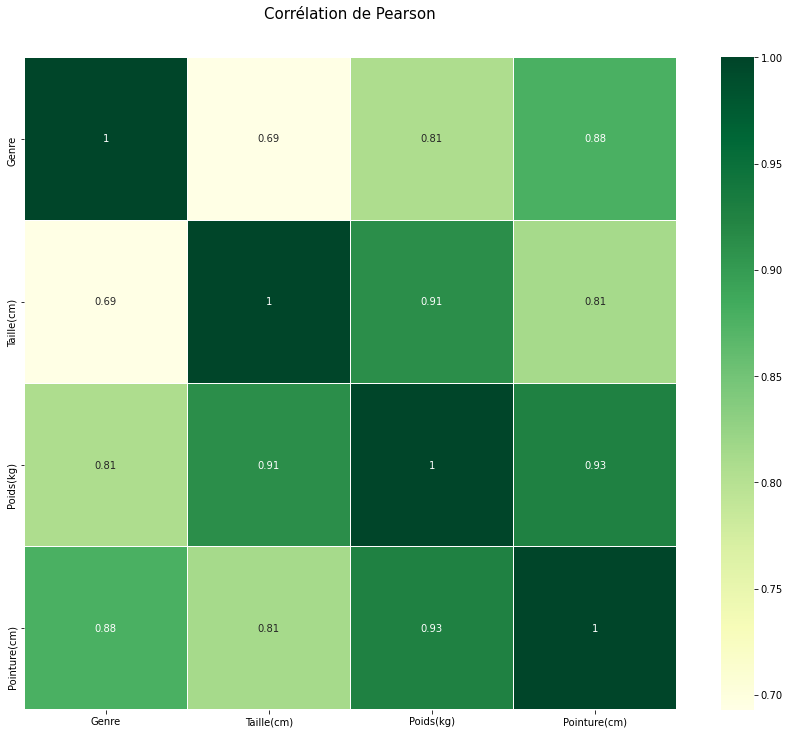

In [17]:
corr = dfplot.corr()
corr = corr.round(3)
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Corrélation de Pearson', y=1.05, size=15)
plt.show()

# DEFINIR LES FEATURES
# SEPARER LE DATASET EN TRAIN ET TEST

In [18]:
X = df.iloc[:, lambda df: [1, 2, 3]]
y = df.iloc[:, 0]

In [19]:
from sklearn.model_selection import train_test_split

#decomposer les donnees predicteurs en training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [20]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 3) (2, 3) (6,) (2,)


# FAIRE APPRENDRE LE MODELE

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# EVALUATION SUR LE TRAIN

In [22]:
y_naive_bayes1 = gnb.predict(X_train)
print("Number of mislabeled points out of a total 0%d points : 0%d" % (X_train.shape[0],(y_train != y_naive_bayes1).sum()))

Number of mislabeled points out of a total 06 points : 00


In [23]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, y_naive_bayes1)
print("Accuracy du modele Naive Bayes predit: " + str(accuracy))


recall_score = metrics.recall_score(y_train, y_naive_bayes1)
print("recall score du modele Naive Bayes predit: " + str(recall_score))

f1_score = metrics.f1_score(y_train, y_naive_bayes1)
print("F1 score du modele Naive Bayes predit: " + str(f1_score))

Accuracy du modele Naive Bayes predit: 1.0
precision du modele Naive Bayes predit: 1.0
recall score du modele Naive Bayes predit: 1.0
recall score du modele Naive Bayes predit: 1.0


# EVALUATION SUR LE TEST

In [27]:
y_naive_bayes2 = gnb.predict(X_test)
print("Number of mislabeled points out of a total 0%d points : 0%d" % (X_test.shape[0],(y_test != y_naive_bayes2).sum()))

recall_score = metrics.recall_score(y_test, y_naive_bayes2)
print("recall score du modele Naive Bayes predit: " + str(recall_score))

f1_score = metrics.f1_score(y_test, y_naive_bayes2)
print("F1 score du modele Naive Bayes predit: " + str(f1_score))

Number of mislabeled points out of a total 02 points : 01
recall score du modele Naive Bayes predit: 0.0
F1 score du modele Naive Bayes predit: 0.0


# PREDICTION SUR UNE OBSERVATION

In [25]:
d = {'Taille(cm)':[183], 'Poids(kg)':[59], 'Pointure(cm)':[20]}
dfToPredict = pd.DataFrame(data=d) 
dfToPredict

,Taille(cm),Poids(kg),Pointure(cm)
0,183,59,20


In [26]:
yPredict = gnb.predict(dfToPredict)
print('La classe predite est : ', yPredict)

La classe predite est :  [0]
